In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
from traced_v2.trace_analyzer import  TraceAnalyzer


In [3]:
import glob
import tqdm
import json

In [4]:
ls data/sites    

AGLT2-CSCS_LCG2/      GLOW-CSCS_LCG2/     Nebraska-CSCS_LCG2/
BNL_ATLAS-CSCS_LCG2/  INFN-T1/            SARA_MATRIX-CSCS_LCG2/
CA_SFU_T2-CSCS_LCG2/  INFN_T1-CSCS_LCG2/
FZK_LCCG2-INFN_T1/    NDGF_T1-CSCS_LCG2/


In [5]:
import matplotlib.pyplot as plt

In [6]:
files = sorted(glob.glob('data/sites/AGLT2-CSCS_LCG2/*.json'))

In [47]:
with open(files[0], 'r') as f:
    data = json.load(f)

In [49]:
from collections import defaultdict
analyzers = {}

In [50]:
# TODO: add bernoulli for modelling missing keysb

In [51]:
push = []
push_idx = []
for file in tqdm.tqdm(files[:34800]):
    
    with open(file, 'r') as f:
        data = json.load(f)
        
    src = data['src']
    dest = data['dest']
    
    if (src, dest) not in analyzers:
        analyzers[(src, dest)] = TraceAnalyzer(src, dest)
    
    push.append(analyzers[(src, dest)].log(data))
    push_idx.append(data['timestamp'])

100%|██████████| 34800/34800 [02:10<00:00, 267.44it/s]


In [52]:
analyzers

{('2001:48a8:68f7:8001:192:41:236:31',
  '2001:620:808:4129::15'): <traced_v2.trace.TraceAnalyzer at 0x7f9696663910>,
 ('192.41.236.31',
  '148.187.129.15'): <traced_v2.trace.TraceAnalyzer at 0x7f9696306860>,
 ('2001:48a8:68f7:8001:192:41:236:32',
  '2001:620:808:4129::15'): <traced_v2.trace.TraceAnalyzer at 0x7f96b5f59240>,
 ('192.41.236.32',
  '148.187.129.15'): <traced_v2.trace.TraceAnalyzer at 0x7f9695ed6380>}

In [53]:
pair = list(analyzers.keys())[0]

In [54]:
analyzer =  analyzers[pair]

In [55]:
an_df = analyzer.trace_model.to_frame()

In [56]:
import pandas as pd

In [57]:
an_df = pd.DataFrame(an_df)

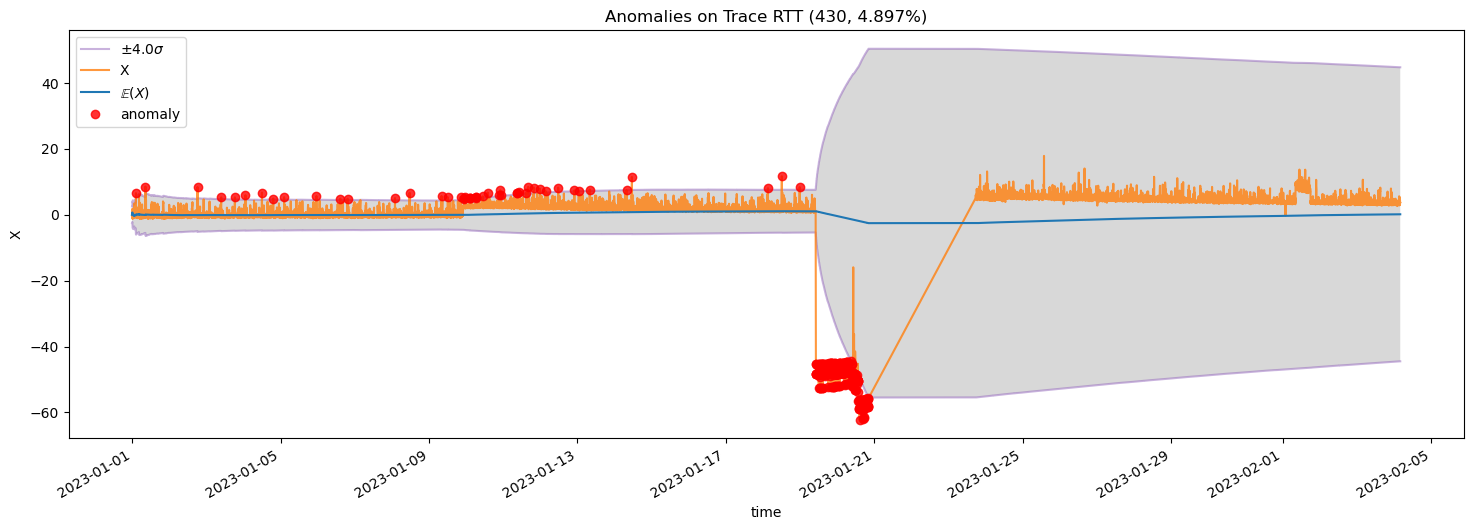

In [58]:
fig=plt.figure(figsize=(18,6))
analyzer.trace_model.final_rtt.plot(kind='Trace RTT')

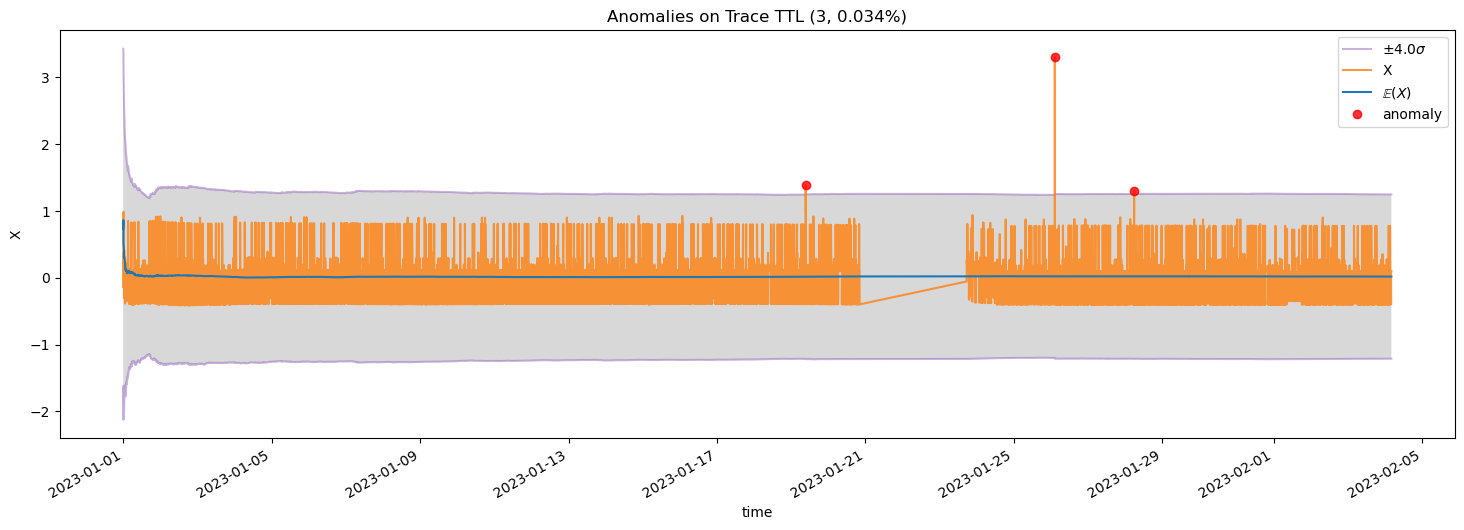

In [59]:
fig=plt.figure(figsize=(18,6))
analyzer.trace_model.final_ttl.plot(kind='Trace TTL')

In [60]:
import matplotlib.pyplot as plt

In [61]:
# fig, ax = plt.subplots(figsize=(20, 10))
# an_df['rtt_sum_errors'].plot(ax=ax, label='rtt_sum_errors')
# an_df[an_df['trace_rtt_anomalies']]['rtt_sum_errors'].plot(ax=ax, marker='o', c='r', linestyle='None', label='rtt_sum_errors')


In [62]:
# fig, ax = plt.subplots(figsize=(20, 10))
# an_df['ttl_sum_errors'].plot(ax=ax, label='rtt_sum_errors')
# an_df[an_df['trace_ttl_anomalies']]['ttl_sum_errors'].plot(ax=ax, marker='o', c='r', linestyle='None', label='rtt_sum_errors')


In [1]:
an_df[an_df['trace_rtt_anomalies']]['rtt_sum_errors'].agg(['mean', 'sum'])

NameError: name 'an_df' is not defined

In [64]:
an_df[an_df['trace_ttl_anomalies']]['ttl_sum_errors'].agg(['mean', 'sum'])

mean    19.357977
sum     58.073931
Name: ttl_sum_errors, dtype: float64

In [65]:
n_anomalies = [tr.n_anomalies for tr, _ in push]

In [66]:
import pandas as pd

In [67]:
tmp = pd.DataFrame({'n_anomalies': n_anomalies, 'timestamp': push_idx}) 

In [68]:
tmp['timestamp'] = pd.to_datetime(tmp['timestamp'], unit='ms')

In [69]:
tmp.set_index('timestamp', inplace=True)

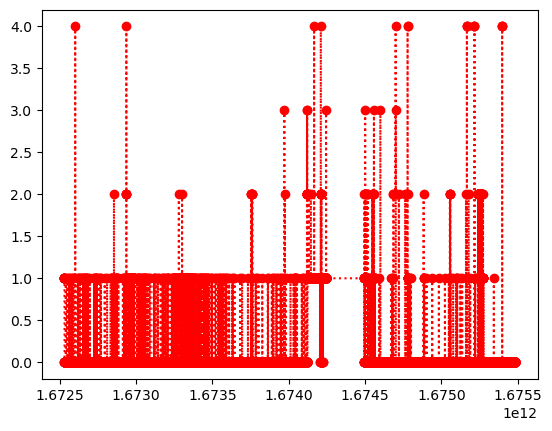

In [88]:
plt.plot(push_idx, n_anomalies, marker='o', c='r', linestyle='dotted', label='rtt_sum_errors')

Text(0.5, 1.0, 'Probability of path having N hops')

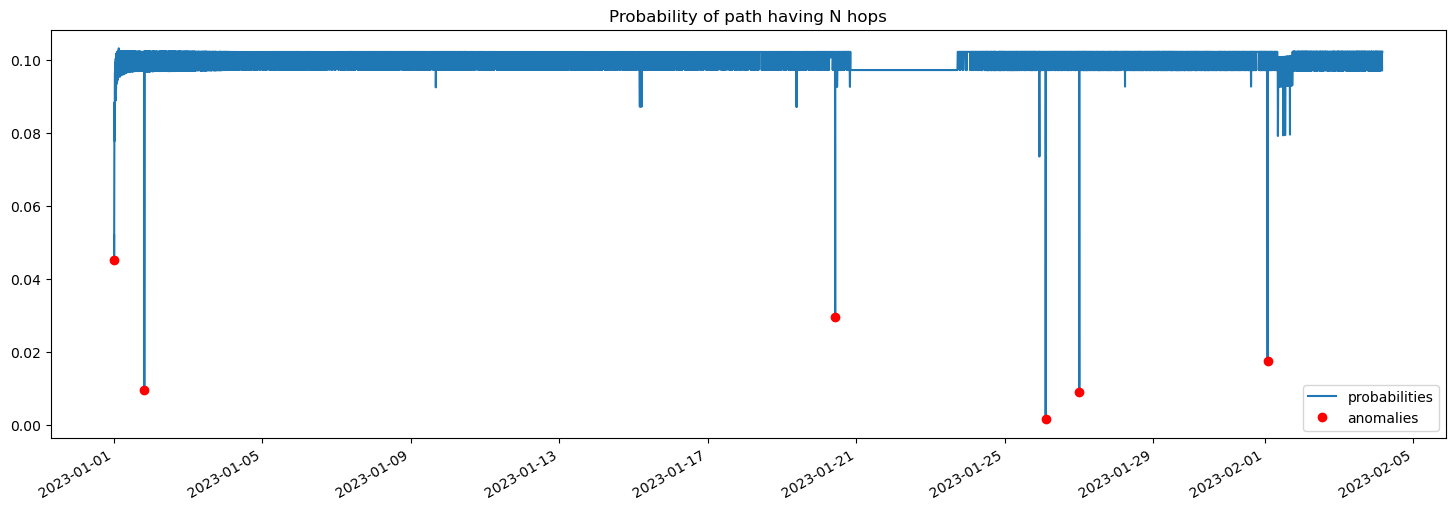

In [74]:
fig=plt.figure(figsize=(18,6))

analyzers[pair].n_hops_model.plot(ax=plt.gca())
plt.title("Probability of path having N hops")

Text(0.5, 1.0, 'ASN sequence probabilities')

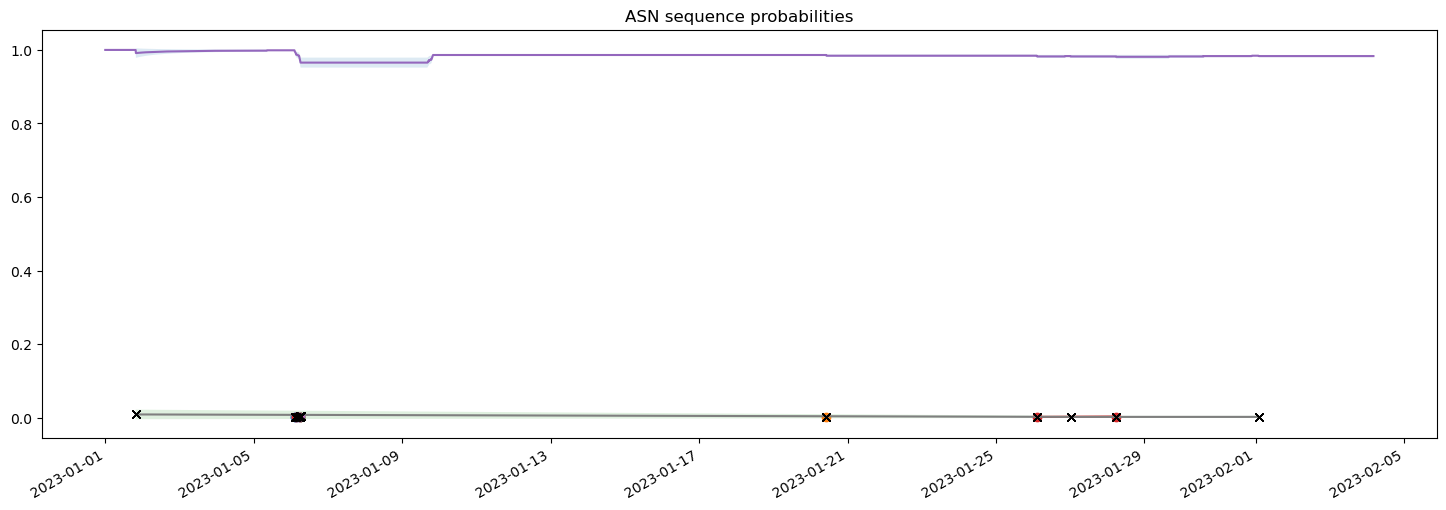

In [75]:
tmp = analyzers[pair].path_probs.to_frame()
# tmp['kl_divergence'].plot()

fig=plt.figure(figsize=(18,6))

ax = analyzers[pair].path_probs.plot(ax=plt.gca())
# tmp[tmp['kl_divergence']>2].plot(marker='x', linestyle='None', y='probabilities', ax=plt.gca(), c='black')

plt.legend().set_visible(False)
plt.title("ASN sequence probabilities")

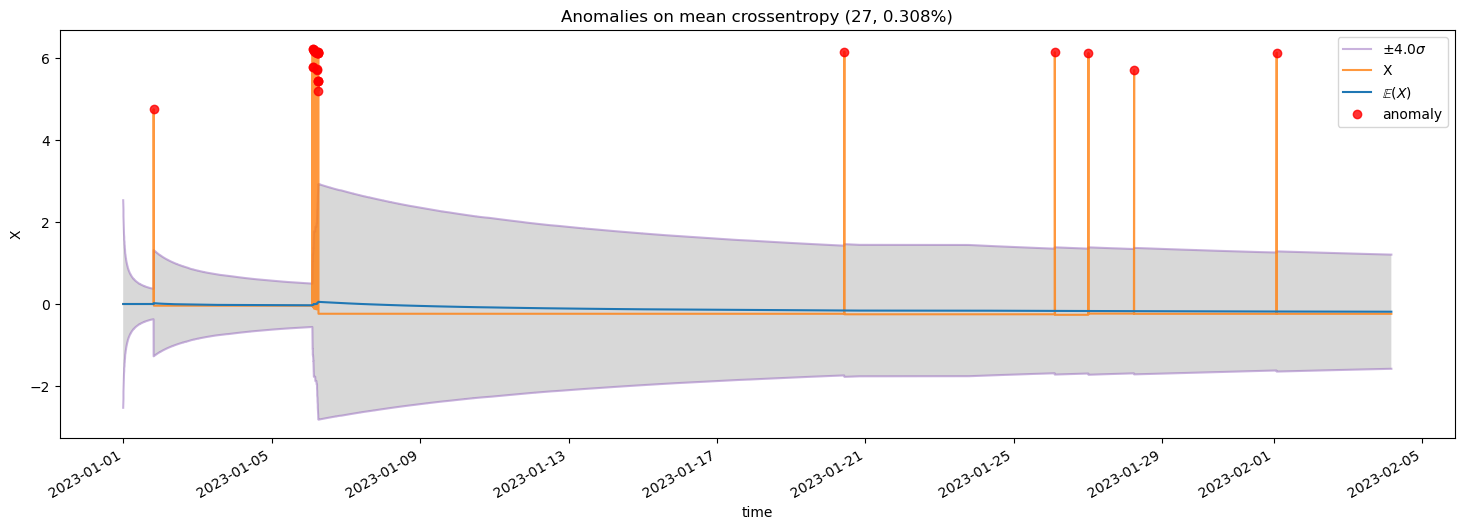

In [89]:
fig=plt.figure(figsize=(18,6))
analyzers[pair].path_probs.kl_divergence_model.plot(kind='mean crossentropy', ax=ax)

Text(0.5, 1.0, 'IP sequence probabilities')

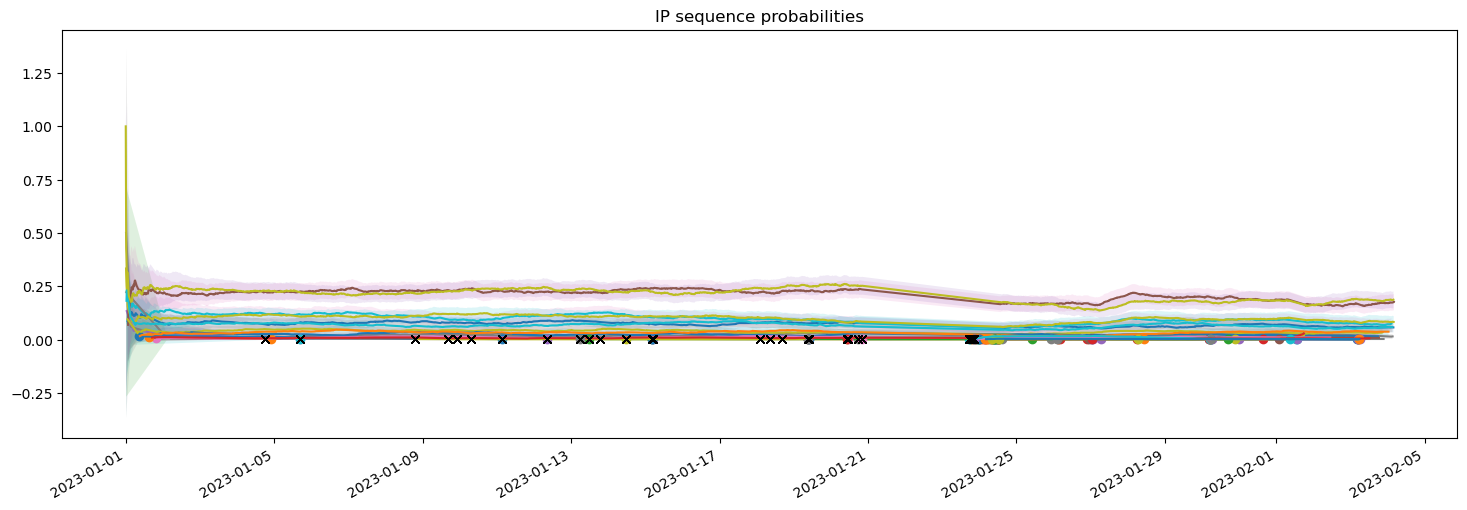

In [77]:
fig=plt.figure(figsize=(18,6))
tmp = analyzers[pair].ip_path_probs.to_frame()

ax = analyzers[pair].ip_path_probs.plot(ax=plt.gca())
# tmp[tmp['kl_divergence']>1].plot(marker='x', linestyle='None', y='probabilities', ax=plt.gca(), c='black')

plt.legend().set_visible(False)
plt.title("IP sequence probabilities")


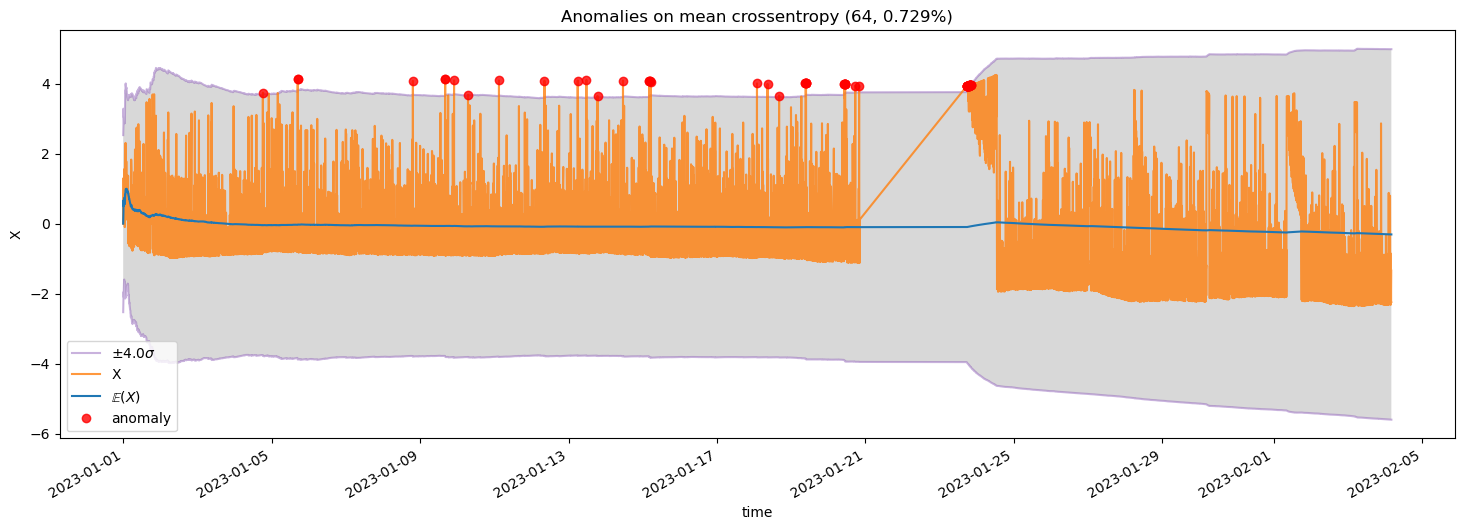

In [90]:
fig=plt.figure(figsize=(18,6))
analyzers[pair].ip_path_probs.kl_divergence_model.plot(kind='mean crossentropy', ax=ax)

Text(0.5, 1.0, 'Probability of destination being reached')

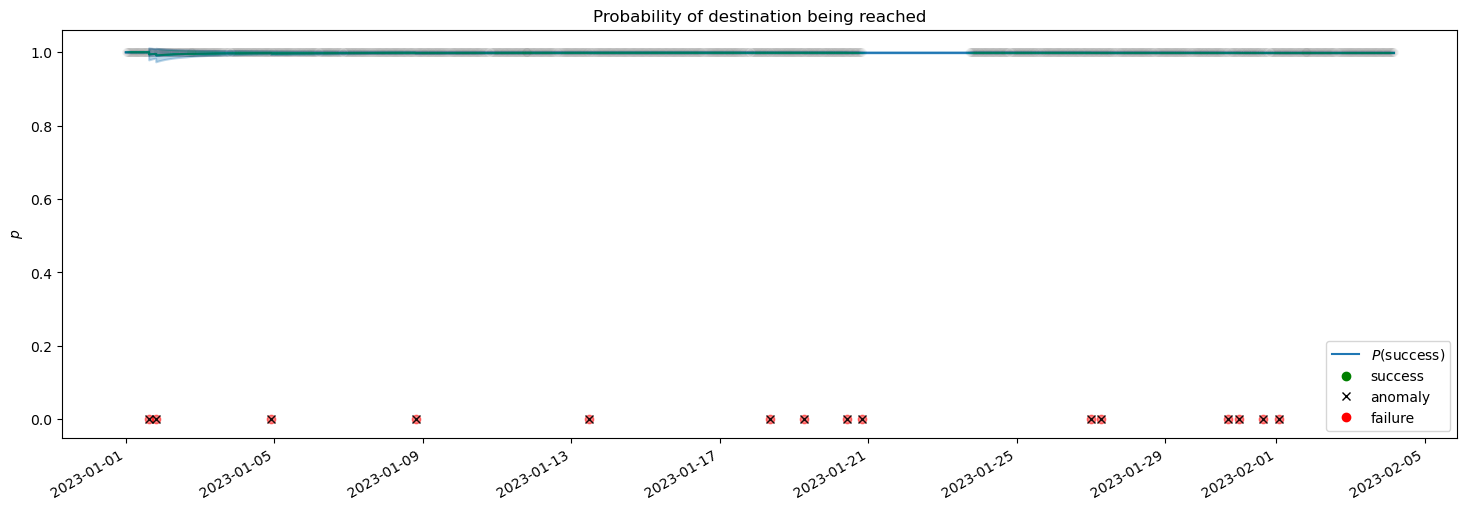

In [79]:
fig=plt.figure(figsize=(18,6))

ax = analyzers[pair].destination_reached.plot(ax=plt.gca()) # non-majority is anomaly if there are both classes 
plt.title("Probability of destination being reached")

Text(0.5, 1.0, 'Probability of path being complete')

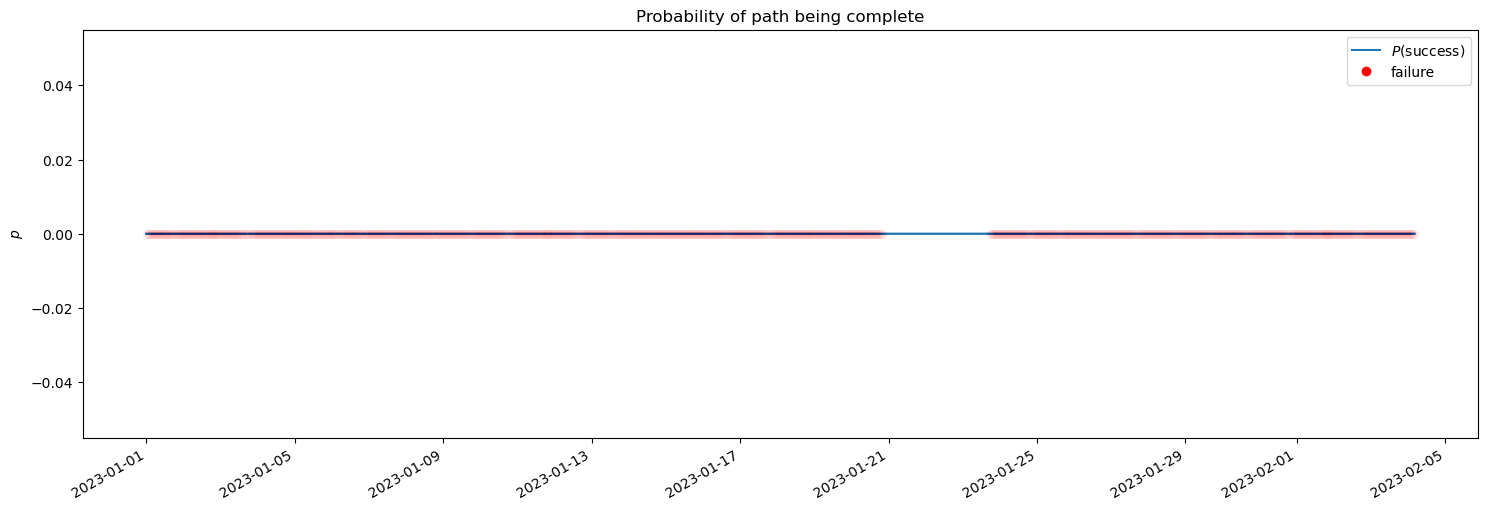

In [80]:
fig=plt.figure(figsize=(18,6))

ax = analyzers[pair].path_complete.plot(ax=plt.gca()) 
plt.title("Probability of path being complete")

In [81]:
# if looping is True mark it as anomaly

In [82]:
tmp = analyzers[pair].looping.to_frame()


Text(0.5, 1.0, 'Probability of path looping')

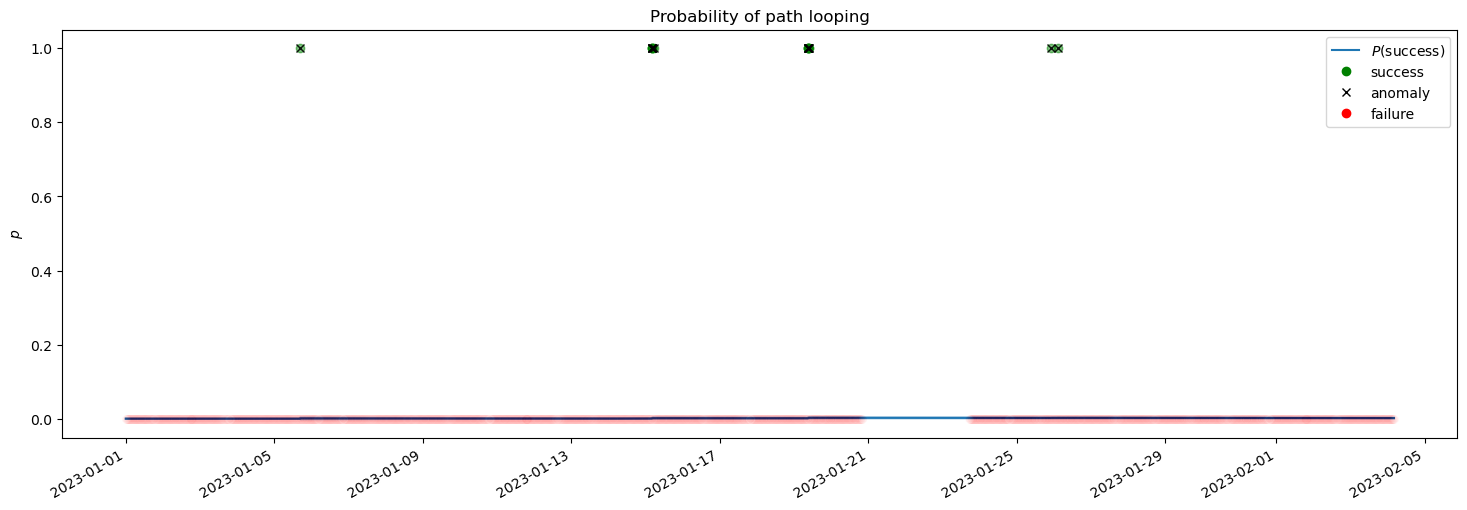

In [83]:
fig=plt.figure(figsize=(18,6))
ax = analyzers[pair].looping.plot(ax=plt.gca())
plt.title("Probability of path looping")


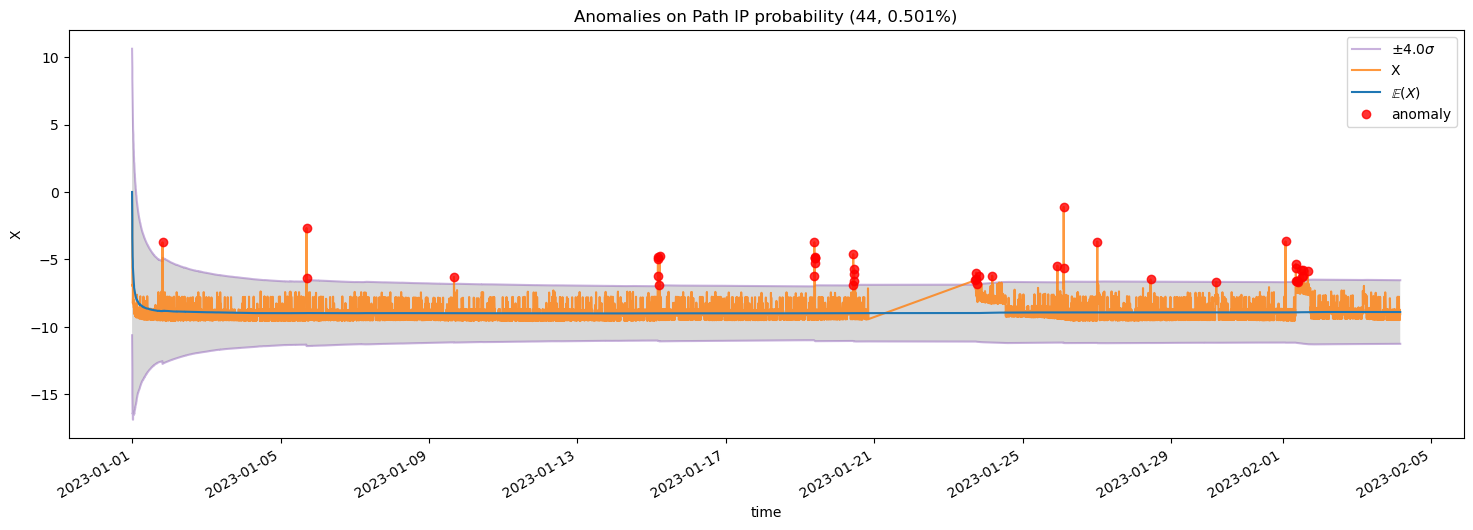

In [84]:
fig=plt.figure(figsize=(18,6))

df = analyzers[pair].ip_model.prob_model.plot(ax=plt.gca(), kind='Path IP probability')

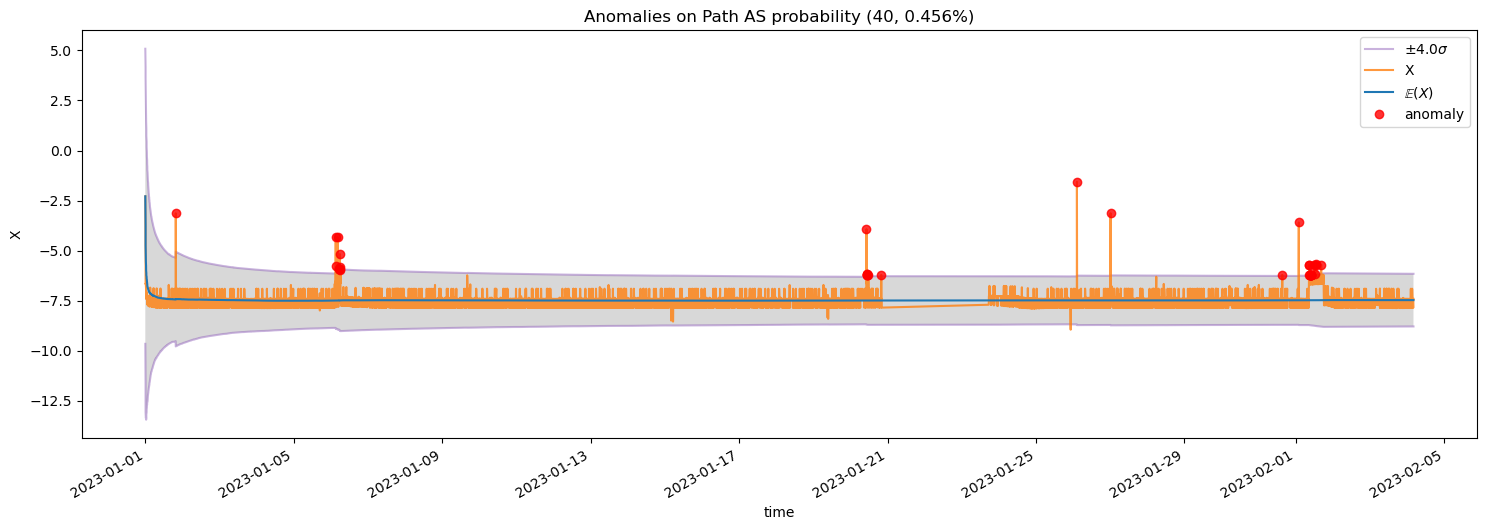

In [85]:
fig=plt.figure(figsize=(18,6))

df = analyzers[pair].as_model.prob_model.plot(ax=plt.gca(), kind='Path AS probability')